#  Лабораторна робота "Побудова прогнозу ціни житла в моделі лінійної регресії"

__Метою__ лабораторної роботи є набуття практичних навичок побудови прогнозу значень деякого показчика створивши відповідну модель лінійної регресії від відомих спостережень.

__ЗАВДАННЯ__:

Побудувати модель для оцінки вартісті житла на основі даних спостережень, які накопичені у зовнішньому файлі наступної структури:

|    |      Показчик      | Формат |
|:--:|:------------------ |:------:|
|  1 | Ціна               |  Float |
|  2 | Кількість кімнат   |   Int  |
|  3 | Ціна за метр кв.   |  Float |
|  4 | Поверх             |   Int  |
|  5 | Кількість поверхів |   Iте  |
|  6 | Рік побудови       |   Int  |
|  7 | Загальна площа     |  Float |
|  8 | Житлова площа      |  Float |
|  9 | Площа кухні        |  Float |
| 10 | Адреса             |   Str  |
| 11 | Дата реєстрації    |   Str  |

Дані для побудови та навчання моделі знаходяться в csv-файлі `kyiv_appatrments.csv`

Після навчання моделі, виконати з її допомогою розрахунок ціни квартир з наступними характеристиками:

|№ пропозиції|Кількість кімнат | Поверх  | Кількість поверхів | Рік побудови | Загальна площа  |Житлова площа | Площа кухні | Адреса | Дата реєстрації |
|:--:|:----:|:-----:|:------:|:------:|-------|-------|-------|--------------------|---------|
|1 |2   | 7   |9     |1969  |62.0   |47.0   |9.0    |Омеляновича-Павленка |3 вересня 2020 р.|
|2 |4   |25   |26    |2018  |124.0  |71.0   |16.0   |                     |7 жовтня 2020 р.|


__Результати__ надати у вигляді таблиці:

|№ пропозиції|Ціна |
|:--:|:----:|
|1| <розрахункова ціна>|
|2| <розрахункова ціна>|

__Етапи виконання роботи__:

Виконання лабораторної роботи, тобто побудова моделі повинна включати наступні етапи:

1. Завантаження вихідного файлу у pandas-датафрейм
2. Вивчення (інспектування) структури датасету та покражання його властивостей:
    - приведення показчиків до необхідного формату
    - вилучення показчиків, які не є інформативними з точки зору поставленої задачі
    - визначення метода та заповнення відсутніх значень
    - збагачення (по можлівості) даних новими показчиками
    - візуалізація розподілення окремих показчиків
3. Розбивка датасету на тренувальний та тестовий
    - відокремити залежний показчик (ціна) від набора незалежних
    - побудувити відповідні тренувальні та тестові датасети
4. Створення лінійного регресора
5. Тренування регресійної моделі
    - підбір вагових коефіцієнтів
    - підбір гіперпараметрів (регуляризація)
6. Оцінка якості побудованої моделі
7. Розрахунок за допомогою моделі ціни на житло з завдання
8. Формування вихідної таблиці з результатами


## ХІД РОБОТИ

In [1]:
# підключити бібліотеки Pandas, NumPy, Matplotlib, Scikit-learn та ін.
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

print('NumPy version:',np.__version__,'\nPadndas version:',pd.__version__,'\nScikit-Learn version:',skl.__version__)

NumPy version: 1.21.5 
Padndas version: 1.4.2 
Scikit-Learn version: 1.0.2


In [2]:
# 1. Завантаження вихідного файлу у pandas-датафрейм 'prices'
apparts = pd.read_csv('kyiv_appatrments.csv', names=['Ціна', 'Кількість кімнат', 'Ціна за м.кв.', 'Поверх', 
'Кількість поверхів', 'Рік побудови', 'Загальна площа', 'Житлова площа', 'Площа кухні', 'Адреса', 'Дата реєстрації'])
# Виводемо Дата фрейм
apparts.head()

,Ціна,Кількість кімнат,Ціна за м.кв.,Поверх,Кількість поверхів,Рік побудови,Загальна площа,Житлова площа,Площа кухні,Адреса,Дата реєстрації
0,140000.0,2,2258.0,7,9,1969,62.0,47.0,9.0,Омеляновича-Павленка,3 вересня 2020 р.
1,105000.0,4,847.0,25,26,2018,124.0,71.0,16.0,,7 жовтня 2020 р.
2,175000.0,3,1786.0,25,26,2010,98.0,None,None,Ованеса Туманяна,1 жовтня 2020 р.
3,30970.0,1,1106.0,12,13,2013,28.0,13.0,5.0,Петропавлівська,1 лютого
4,82000.0,2,1281.0,18,26,None,64.0,None,None,Дніпровська,*** not found


### 2. Вивчення (інспектування) структури датасету та покращення його властивостей:

In [3]:
# інспектування датафрейму `apparts`
print(apparts.info())
apparts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ціна                728 non-null    float64
 1   Кількість кімнат    728 non-null    object 
 2   Ціна за м.кв.       728 non-null    object 
 3   Поверх              728 non-null    object 
 4   Кількість поверхів  728 non-null    object 
 5   Рік побудови        728 non-null    object 
 6   Загальна площа      728 non-null    object 
 7   Житлова площа       728 non-null    object 
 8   Площа кухні         728 non-null    object 
 9   Адреса              728 non-null    object 
 10  Дата реєстрації     728 non-null    object 
dtypes: float64(1), object(10)
memory usage: 62.7+ KB
None


,Ціна
count,7.280000e+02
mean,2.001384e+05
std,6.748939e+05
min,1.009210e+04
25%,6.500000e+04
50%,1.039500e+05
75%,1.700000e+05
max,1.570000e+07


In [4]:
# форматування колонок (метод 'astype')
apparts['Ціна за м.кв.'] = pd.to_numeric(apparts['Ціна за м.кв.'],errors='coerce')
apparts['Ціна за м.кв.'] = pd.to_numeric(apparts['Ціна за м.кв.'],errors='coerce')
apparts['Загальна площа'] = pd.to_numeric(apparts['Загальна площа'],errors='coerce')
apparts['Житлова площа'] = pd.to_numeric(apparts['Житлова площа'],errors='coerce')
apparts['Площа кухні'] = pd.to_numeric(apparts['Площа кухні'],errors='coerce')
apparts['Кількість кімнат'] = pd.to_numeric(apparts['Кількість кімнат'],errors='coerce')
apparts['Поверх'] = pd.to_numeric(apparts['Поверх'],errors='coerce')
apparts['Кількість поверхів'] = pd.to_numeric(apparts['Кількість поверхів'],errors='coerce')
apparts['Рік побудови'] = pd.to_numeric(apparts['Рік побудови'],errors='coerce')
# Встановлюємо потрібні типи даних для колонок (int)
apparts = apparts.replace(np.nan, 0, regex=True)
apparts['Кількість кімнат'] = apparts['Кількість кімнат'].astype(int)
apparts['Поверх'] = apparts['Поверх'].astype(int)
apparts['Кількість поверхів'] = apparts['Кількість поверхів'].astype(int)
apparts['Рік побудови'] = apparts['Рік побудови'].astype(int)
# Встановлюємо потрібні типи даних для колонок (string)
apparts['Адреса'] = apparts['Адреса'].astype('string')
apparts['Дата реєстрації'] = apparts['Дата реєстрації'].astype('string')
#Виводимо інформацію колонок
print(apparts.info())
apparts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ціна                728 non-null    float64
 1   Кількість кімнат    728 non-null    int32  
 2   Ціна за м.кв.       728 non-null    float64
 3   Поверх              728 non-null    int32  
 4   Кількість поверхів  728 non-null    int32  
 5   Рік побудови        728 non-null    int32  
 6   Загальна площа      728 non-null    float64
 7   Житлова площа       728 non-null    float64
 8   Площа кухні         728 non-null    float64
 9   Адреса              728 non-null    string 
 10  Дата реєстрації     728 non-null    string 
dtypes: float64(5), int32(4), string(2)
memory usage: 51.3 KB
None


,Ціна,Кількість кімнат,Ціна за м.кв.,Поверх,Кількість поверхів,Рік побудови,Загальна площа,Житлова площа,Площа кухні
count,7.280000e+02,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2.001384e+05,2.214286,2075.902885,9.300824,17.087912,1481.041209,70.266484,28.879121,11.431319
std,6.748939e+05,1.037516,5883.120456,7.033533,8.915033,874.787414,54.578821,32.028558,11.113307
min,1.009210e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000e+04,1.000000,1144.250000,4.000000,9.000000,0.000000,44.000000,0.000000,0.000000
50%,1.039500e+05,2.000000,1551.000000,7.000000,18.000000,1994.000000,63.000000,25.000000,10.000000
75%,1.700000e+05,3.000000,2185.750000,14.000000,25.000000,2015.000000,89.000000,43.000000,16.000000
max,1.570000e+07,7.000000,157000.000000,33.000000,47.000000,2021.000000,520.000000,320.000000,78.000000


In [5]:
# визначення та вилучення зайвих колонок (метод 'drop')
apparts.drop(['Адреса', 'Дата реєстрації'], axis=1, inplace=True)
apparts.dtypes

Ціна                  float64
Кількість кімнат        int32
Ціна за м.кв.         float64
Поверх                  int32
Кількість поверхів      int32
Рік побудови            int32
Загальна площа        float64
Житлова площа         float64
Площа кухні           float64
dtype: object

In [6]:
# заповнення відсутніх значень (метод `fillna` або `dropna`)
apparts.replace('None', np.nan, inplace=True)

# заповнення відсутніх значень (метод `fillna` або `dropna`) у незалежних показчиків
for col in apparts.columns[1:]:
        apparts[col].fillna(apparts[col].median(), inplace=True)
apparts.head()

,Ціна,Кількість кімнат,Ціна за м.кв.,Поверх,Кількість поверхів,Рік побудови,Загальна площа,Житлова площа,Площа кухні
0,140000.0,2,2258.0,7,9,1969,62.0,47.0,9.0
1,105000.0,4,847.0,25,26,2018,124.0,71.0,16.0
2,175000.0,3,1786.0,25,26,2010,98.0,0.0,0.0
3,30970.0,1,1106.0,12,13,2013,28.0,13.0,5.0
4,82000.0,2,1281.0,18,26,0,64.0,0.0,0.0


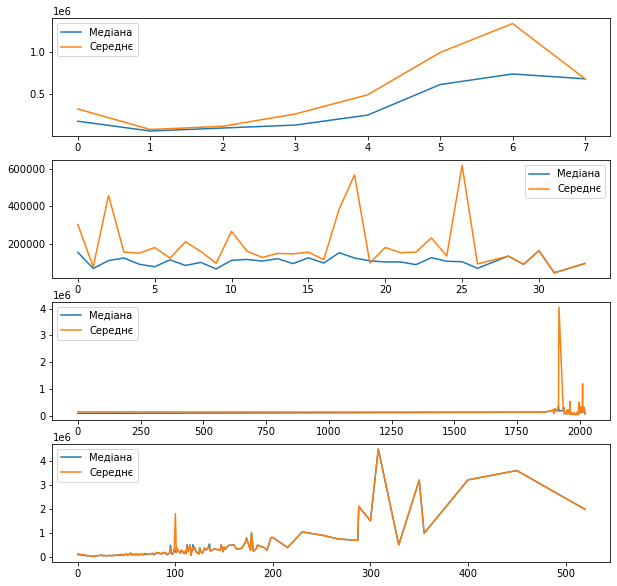

In [7]:
# візуалізація впливу окремих показчиків на показчик 'ціна'
# скористатись методом `scatter` або `plot` для виводу залежності ціни (Y) від
# показчика, що досліджується (X)
fig, ax = plt.subplots(4, figsize=(10,10))

median_by_rooms = apparts.groupby(apparts['Кількість кімнат'])['Ціна'].median()
mean_by_rooms = apparts.groupby(apparts['Кількість кімнат'])['Ціна'].mean()
ax[0].plot(median_by_rooms, label='Медіана')
ax[0].plot(mean_by_rooms, label='Середнє')
ax[0].xlabel = 'Кількість кімнат'
ax[0].ylabel = 'Ціна'
ax[0].legend()

median_by_level = apparts.groupby(apparts['Поверх'])['Ціна'].median()
mean_by_level = apparts.groupby(apparts['Поверх'])['Ціна'].mean()
ax[1].plot(median_by_level, label='Медіана')
ax[1].plot(mean_by_level, label='Середнє')
ax[1].xlabel = 'Поверх'
ax[1].ylabel = 'Ціна'
ax[1].legend()

median_by_year = apparts.groupby(apparts['Рік побудови'])['Ціна'].median()
mean_by_year = apparts.groupby(apparts['Рік побудови'])['Ціна'].mean()
ax[2].plot(median_by_year, label='Медіана')
ax[2].plot(mean_by_year, label='Середнє')
ax[2].xlabel = 'Рік побудови'
ax[2].ylabel = 'Ціна'
ax[2].legend()

median_by_square = apparts.groupby(apparts['Загальна площа'])['Ціна'].median()
mean_by_square = apparts.groupby(apparts['Загальна площа'])['Ціна'].mean()
ax[3].plot(median_by_square, label='Медіана')
ax[3].plot(mean_by_square, label='Середнє')
ax[3].xlabel = 'Загальна площа'
ax[3].ylabel = 'Ціна'
ax[3].legend()

plt.show()

In [8]:
# візуалізація впливу окремих показчиків на показчик 'ціна'
# скористатись методом `scatter` або `plot` для виводу залежності ціни (Y) від
# показчика, що досліджується (X)
apparts['Кількість кімнат'] = apparts['Кількість кімнат'].astype('int8')
apparts['Ціна за м.кв.'] = apparts['Ціна за м.кв.'].astype('float')
apparts['Поверх'] = apparts['Поверх'].astype('int8')
apparts['Кількість поверхів'] = apparts['Кількість поверхів'].astype('int16')
apparts['Рік побудови'] = apparts['Рік побудови'].astype('int16')
apparts['Загальна площа'] = apparts['Загальна площа'].astype('float')
apparts['Житлова площа'] = apparts['Житлова площа'].astype('float')
apparts['Площа кухні'] = apparts['Площа кухні'].astype('float')
#Виводимо інформацію колонок
print(apparts.info())
apparts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ціна                728 non-null    float64
 1   Кількість кімнат    728 non-null    int8   
 2   Ціна за м.кв.       728 non-null    float64
 3   Поверх              728 non-null    int8   
 4   Кількість поверхів  728 non-null    int16  
 5   Рік побудови        728 non-null    int16  
 6   Загальна площа      728 non-null    float64
 7   Житлова площа       728 non-null    float64
 8   Площа кухні         728 non-null    float64
dtypes: float64(5), int16(2), int8(2)
memory usage: 32.8 KB
None


,Ціна,Кількість кімнат,Ціна за м.кв.,Поверх,Кількість поверхів,Рік побудови,Загальна площа,Житлова площа,Площа кухні
count,7.280000e+02,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2.001384e+05,2.214286,2075.902885,9.300824,17.087912,1481.041209,70.266484,28.879121,11.431319
std,6.748939e+05,1.037516,5883.120456,7.033533,8.915033,874.787414,54.578821,32.028558,11.113307
min,1.009210e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000e+04,1.000000,1144.250000,4.000000,9.000000,0.000000,44.000000,0.000000,0.000000
50%,1.039500e+05,2.000000,1551.000000,7.000000,18.000000,1994.000000,63.000000,25.000000,10.000000
75%,1.700000e+05,3.000000,2185.750000,14.000000,25.000000,2015.000000,89.000000,43.000000,16.000000
max,1.570000e+07,7.000000,157000.000000,33.000000,47.000000,2021.000000,520.000000,320.000000,78.000000


### 3. Побудова та тренування моделі

In [9]:
# розділити датафрейм `apparts` на датафрейми `prices` та `props` (метод `train_test_split`)

prices = pd.DataFrame(apparts['Ціна'])
props = apparts.drop(['Ціна'], axis=1)

In [10]:
# побудувати тренувальні та тестові датасети (метод `train_test_split`):
# `prices_train`, `props_train`, `prices_test` та `props_test`

props_train, props_test, prices_train, prices_test = \
    train_test_split(props, prices, test_size=.33, random_state=42)
print('Props train:',props_train.shape,'\t|  Props test:',props_test.shape)
print('Prices train:',prices_train.shape,'\t|  Prices test:',prices_test.shape)

Props train: (487, 8) 	|  Props test: (241, 8)
Prices train: (487, 1) 	|  Prices test: (241, 1)


In [11]:
# створити лінійний регрессор (конструктор `LinearRegression`) 
lr = skl.linear_model.LinearRegression(fit_intercept=False)

In [12]:
# тренувати регресор `lr` (метод `fit`)
lr.fit(props_train,prices_train)

LinearRegression(fit_intercept=False)

In [13]:
# вивести та оцінити отримані коєфіціенти регресії
print(lr.coef_)
print(lr.intercept_)

[[-30535.64503494     98.04122274   1788.66896301  -5161.35279665
     -48.755252     2614.50256745   1351.87644447   -579.49076966]]
0.0


In [14]:
# вивести показчики якости побудованої моделі (`score`)
print(lr.score(props_train, prices_train))
print(lr.score(props_test, prices_test))

0.6919143768052258
0.9377708635456218


In [15]:
# використавши модель побудувати розрахункову ціну на житло (метод `predict`)
price_1 = lr.predict(props_train)
price_2 = lr.predict(props_test)
print('\nTrained Prices Train:\n',pd.DataFrame(price_1))
print('\nTrained Prices Test:\n',pd.DataFrame(price_2))


Trained Prices Train:
                  0
0    -75944.807028
1    102398.363140
2    251035.888729
3    122826.574316
4    175399.518334
..             ...
482  114760.905564
483   -3212.159607
484   83220.687044
485  162512.809936
486  109160.065305

[487 rows x 1 columns]

Trained Prices Test:
                 0
0    1.129840e+04
1    2.988169e+05
2    9.638947e+04
3    1.914336e+05
4    2.294641e+05
..            ...
236  3.327782e+03
237  1.641925e+06
238  3.294590e+05
239 -5.296616e+04
240  1.298485e+05

[241 rows x 1 columns]


In [16]:
# побудувити таблицю з результатами 
print('\nPrices Train:\n',prices_train)
print('\nPrices Test:\n',prices_test)


Prices Train:
          Ціна
43   175000.0
42    84000.0
73    90000.0
167  108000.0
431  107000.0
..        ...
71   110000.0
106   41000.0
270   58900.0
435  145000.0
102   66500.0

[487 rows x 1 columns]

Prices Test:
           Ціна
39     48000.0
335   220000.0
326    53000.0
512    76800.0
548   155000.0
..         ...
543    55000.0
404  3200000.0
248   165000.0
140    40500.0
28     82000.0

[241 rows x 1 columns]
